In [1]:
# TensorFlow ve Keras kütüphanelerini import ediyoruz
import tensorflow as tf
from tensorflow import keras

# Grafik çizimleri için matplotlib kütüphanesini import ediyoruz
import matplotlib.pyplot as plt

# CIFAR-10 veri setini yükleyip eğitim ve test setlerine ayırıyoruz
# x_train, y_train: eğitim verisi ve etiketleri
# x_test, y_test: test verisi ve etiketleri
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

CIFAR-10 veri seti, 10 farklı sınıfa ait toplam 60.000 adet 32x32 boyutunda renkli görüntü içerir. Bu sınıflar; uçak, araba, kuş, kedi, geyik, köpek, kurbağa, at, gemi ve kamyondur. Veri seti, makine öğrenmesi ve derin öğrenme alanlarında görüntü sınıflandırma problemlerini test etmek için yaygın olarak kullanılır. Eğitim ve test verileri olarak ayrılmıştır; eğitim verileri modelin öğrenmesi için, test verileri ise modelin doğruluğunu değerlendirmek için kullanılır. CIFAR-10, farklı sınıfların görsel çeşitliliğini barındırdığı için, özellikle küçük boyutlu görüntülerle sınıflandırma algoritmalarını geliştirmek ve performanslarını ölçmek için idealdir.

In [2]:
# Piksel değerlerini 0-1 aralığına getiriyoruz, böylece model daha hızlı ve verimli öğrenir
x_train, x_test = x_train / 255.0, x_test / 255.0

# Etiketleri one-hot encoding formatına çeviriyoruz
# Böylece her sınıf 10 elemanlı bir vektörle temsil edilir
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Görüntü verilerinin piksel değerleri genellikle 0 ile 255 arasında değişir. Bu değerlerin 0 ile 1 arasına normalleştirilmesi, modelin daha hızlı ve verimli öğrenmesini sağlar. Ayrıca sınıf etiketleri one-hot encoding formatına çevrilir. Bu formatta her sınıf, 10 elemanlı bir vektörle temsil edilir ve doğru sınıfın bulunduğu konum 1, diğerleri 0 olarak kodlanır. Bu dönüşümler, sınıflandırma modelinin çıktılarıyla karşılaştırmayı ve hata hesaplamayı kolaylaştırır.

In [4]:
# CIFAR-10 görüntülerini sınıflandırmak için bir CNN modeli oluşturuyoruz
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Bu model, CIFAR-10 veri setindeki renkli görüntüleri 10 sınıfa ayırmak için tasarlanmış bir konvolüsyonel sinir ağıdır (CNN). Konvolüsyon ve pooling katmanları görüntüden özellikleri çıkarır ve boyutunu küçültür, flatten katmanı bu özellikleri tek boyutlu vektöre dönüştürür. Dense katmanları öğrenmeyi tamamlayarak sınıflara ait olasılıkları üretir. Son katmandaki softmax aktivasyonu, her görüntünün hangi sınıfa ait olduğuna dair 10 olasılık değerini verir.

In [5]:
# Modeli derliyoruz
model.compile(
    optimizer="adam",                   # Adam optimizasyon algoritması, ağırlıkları güncellemek için kullanılır
    loss="categorical_crossentropy",    # Çok sınıflı sınıflandırma problemleri için uygun kayıp fonksiyonu
    metrics=["accuracy"]                # Modelin doğruluğunu takip etmek için accuracy metriği
)

Bu komut ile model eğitim için hazır hâle getirilir. Adam optimizatörü, ağırlıkları en uygun şekilde güncelleyerek öğrenmeyi hızlandırır. Kayıp fonksiyonu olarak categorical crossentropy seçildiği için modelin tahmin ettiği olasılık dağılımı ile gerçek sınıf dağılımı arasındaki fark ölçülür. Accuracy metriği sayesinde modelin doğru sınıflandırma oranı takip edilebilir.

In [6]:
# Modeli eğitim verisi ile eğitiyoruz ve doğrulama verisi ile performansını takip ediyoruz
history = model.fit(
    x_train, y_train,               # Eğitim verisi ve etiketleri
    epochs=15,                      # Modelin tüm eğitim verisi üzerinde kaç kez güncelleneceği
    validation_data=(x_test, y_test) # Her epoch sonunda modelin test verisi üzerindeki performansını kontrol et
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 491s 283ms/step - accuracy: 0.4419 - loss: 1.5236 - val_accuracy: 0.5589 - val_loss: 1.2365
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.5899 - loss: 1.1587 - val_accuracy: 0.6307 - val_loss: 1.0525
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6444 - loss: 1.0091 - val_accuracy: 0.6598 - val_loss: 0.9836
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6786 - loss: 0.9187 - val_accuracy: 0.6726 - val_loss: 0.9357
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7037 - loss: 0.8410 - val_accuracy: 0.6657 - val_loss: 0.9667
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7255 - loss: 0.7786 - val_accuracy: 0.6907 - val_loss: 0.9076
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7447 - loss: 0.7304 - val_accuracy: 0.6898 - val_loss: 0.9140
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7603

Model, CIFAR-10 veri setinde 15 epoch boyunca düzenli bir öğrenme süreci gösterdi. Eğitim doğruluğunun sürekli artması ve kaybın azalması, modelin eğitim verisi üzerindeki öğrenme kapasitesinin yüksek olduğunu gösteriyor. Doğrulama doğruluğu ise genel olarak artmasına rağmen zaman zaman dalgalanmalar gösterdi; bu durum, modelin bazı örneklerde sınıfları ayırt etmekte zorlandığını veya eğitim verisine biraz fazla uyum sağladığını (overfitting) işaret edebilir. Özellikle epoch 12’den sonra doğrulama kaybındaki artış ve doğrulama doğruluğundaki düşüş, modelin genelleme yeteneğinin sınırlı olduğuna işaret ediyor.

Genel olarak model, CIFAR-10’daki temel sınıfları tanımakta başarılı, ancak doğrulama performansının eğitim performansına göre daha düşük olması, modelin karmaşık veya benzer sınıflarda hata yapabileceğini gösteriyor.

In [7]:
# Eğitilmiş modeli test verisi üzerinde değerlendiriyoruz
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - 10ms/step - accuracy: 0.7109 - loss: 0.9954

Test accuracy: 0.7109000086784363


Bu sonuç, modelin daha önce görmediği CIFAR-10 görüntülerini doğru sınıflandırma oranını gösterir. Eğitim doğruluğu %80 civarında olmasına rağmen test doğruluğu biraz daha düşük kaldı; bu, modelin eğitim verisine göre test verisine tam olarak genelleme yapamadığını ve hafif bir overfitting durumu olabileceğini gösterir. Genel olarak model, çoğu sınıfı doğru tanımakta başarılı, ancak bazı sınıflarda hata yapma olasılığı hâlâ mevcut.

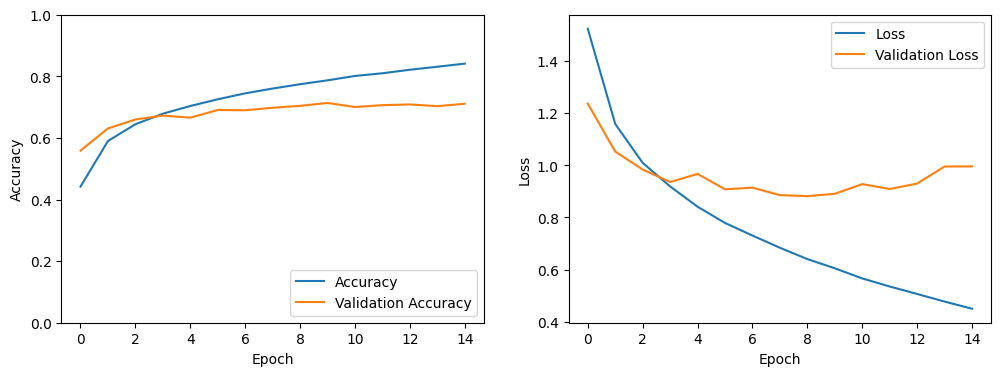

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Eğitim doğruluk eğrisi, modelin her epoch ile birlikte düzenli olarak öğrenmeye devam ettiğini gösteriyor; yani model zamanla eğitim verisi üzerinde daha başarılı hâle geliyor. Doğrulama doğruluğu eğrisi de genel olarak yukarı yönlü bir trend izliyor, ancak bazı küçük değişimler var. Bu değişimler, modelin doğrulama verisine karşı zaman zaman daha az başarılı olduğunu ve genelleme yeteneğinde hafif tutarsızlıklar olabileceğini gösteriyor. Genel olarak hem eğitim hem de doğrulama doğruluk eğrileri modelin öğrenme sürecinin düzgün ilerlediğini ve çoğu sınıfta doğru tahminler yapabildiğini işaret ediyor.

Eğitim kaybı eğrisi, modelin hatalarının epoch ilerledikçe azaldığını ve öğrenmenin devam ettiğini gösteriyor. Doğrulama kaybı eğrisi de genel olarak düşüş trendinde olmasına rağmen bazı dönemlerde yükselmeler gözlemleniyor. Bu, modelin bazı epochlarda doğrulama verisine karşı daha fazla hata yapabileceğini ve genelleme performansının zaman zaman değişebileceğini işaret ediyor. Genel olarak kayıp eğrileri, modelin öğrenme sürecinin başarılı bir şekilde ilerlediğini ve eğitim verisi üzerinde hatalarını azalttığını gösteriyor.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


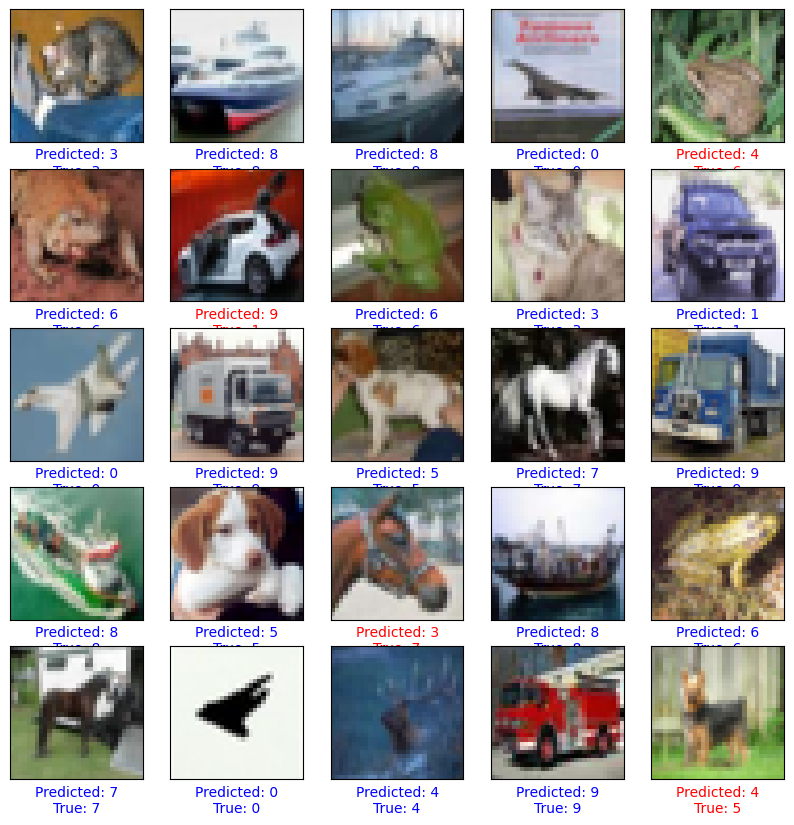

In [9]:
# Test verisinden ilk 25 görüntüyü tahmin ediyoruz ve her bir görüntüyü doğru veya yanlış sınıflandırmaya göre renk kodlu olarak görselleştiriyoruz
predictions = model.predict(x_test) 
plt.figure(figsize=(10, 10)) 
for i in range(25): 
    plt.subplot(5, 5, i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(x_test[i], cmap=plt.cm.binary) 
    predicted_label = predictions[i].argmax() 
    true_label = y_test[i].argmax() 
    if predicted_label == true_label: 
        color = 'blue' 
    else: 
        color = 'red' 
    plt.xlabel(f'Predicted: {predicted_label}\nTrue: {true_label}', color=color) 
plt.show()